<a href="https://colab.research.google.com/github/jacomas24/Azure-Projects/blob/main/Web%20Scraping%20with%20Beautiful%20Soup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping with Beautiful Soup

After eating chocolate bars your whole life, you've decided to go on a quest to find the greatest chocolate bar in the world.

You've found a website that has a table with over 1700 reviews of chocolate bars from all around the world.

The rating scale is from 1-5, as described in <a href="http://flavorsofcacao.com/review_guide.html">this review guide</a>. A `1` is "unpleasant" chocolate, while a `5` is a bar that transcends "beyond the ordinary limits".

## Make Some Chocolate Soup

1. Let's make a request to the website to get the raw HTML, which we later turn into a BeautifulSoup object.

   The URL is

```
https://content.codecademy.com/courses/beautifulsoup/cacao/index.html
```

In [1]:
import requests
chocolate = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")

2. Create a BeautifulSoup object called `soup` to traverse this HTML.

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(chocolate.content, "html.parser")

3. Print out the `soup` object to explore the HTML.

In [ ]:
print(soup)

## Where are the best cocao beans grown?

4. How are ratings distributed? Let's make a histogram of this data.

In [19]:
rating_tags = soup.find_all(attrs={"class": "Rating"})


5. Create a list to store all the ratings in.

In [5]:
ratings = []

In [24]:
for rating in rating_tags[1:]:
    rate_text = rating.get_text()
    rate_score = float(rate_text)
    ratings.append(rate_score)


6. Create a histogram of the ratings values:

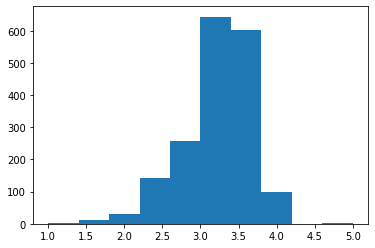

In [7]:
import matplotlib.pyplot as plt
plt.hist(ratings)
plt.show()

## Which chocolatier makes the best chocolate?

7. We want to now find the 10 most highly rated chocolatiers.
 
   Create a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, find the ones with the highest average rating.

In [25]:
company_tags = soup.select(".Company")

In [9]:
names = []

In [10]:
for td in company_tags[1:]:
    names.append(td.get_text())

In [11]:
import pandas as pd
company_ratings = {"Company": names, "Ratings": ratings}
cacao_df = pd.DataFrame.from_dict(company_ratings)

8. Group your DataFrame by Company and take the average of the grouped ratings.

    Then, get the 10 highest rated chocolate companies.

In [12]:
mean_ratings = cacao_df.groupby("Company").Ratings.mean()
ten_best = mean_ratings.nlargest(10)
print(ten_best)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Ratings, dtype: float64


## Is more cacao better?

9. We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better than those with lower levels of cacoa.
   
   Create a list that contains all of the cocoa percentages. 

In [13]:
cocoa_percents = []
cocoa_percent_tags = soup.select(".CocoaPercent")

for td in cocoa_percent_tags[1:]:
    percent = float(td.get_text().strip('%'))
    cocoa_percents.append(percent)

10. Add the cocoa percentages as a column called `"CocoaPercentage"` in the DataFrame that has companies and ratings in it.

In [14]:
cocoa = {"Company": names, "Ratings": ratings, "CocoaPercentage": cocoa_percents}
cocoa_df = pd.DataFrame.from_dict(cocoa)

11. Make a scatterplot of ratings vs percentage of cocoa.

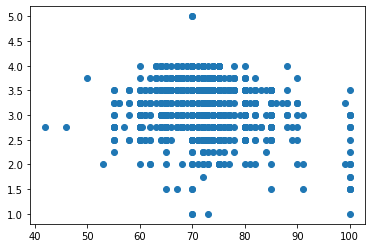

In [15]:
plt.scatter(cocoa_df.CocoaPercentage, cocoa_df.Ratings)
plt.show()

12. Draw a line of best-fit over the scatterplot.

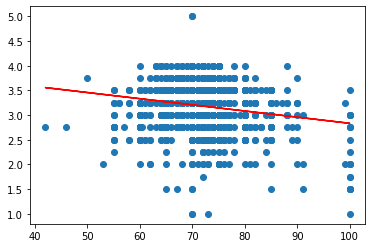

In [16]:
import numpy as np
plt.scatter(cocoa_df.CocoaPercentage, cocoa_df.Ratings)
z = np.polyfit(cocoa_df.CocoaPercentage, cocoa_df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(cocoa_df.CocoaPercentage, line_function(cocoa_df.CocoaPercentage), "r-")
plt.show()

## Explore!

13. What other kinds of questions can you answer? Use a combination of BeautifulSoup and Pandas to explore some more.

In [17]:
## Question 1: Where are the best cocoa beans grown?
origins = []
origin_tags = soup.select(".BroadBeanOrigin")

for td in origin_tags[1:]:
    country = td.get_text()
    origins.append(country)
    
beans = {"Bean Origin": origins, "CocoaPercentage": cocoa_percents}
beans_df = pd.DataFrame.from_dict(beans)

mean_percent = beans_df.groupby("Bean Origin").CocoaPercentage.mean()
ten_best = mean_percent.nlargest(10)
print(ten_best)

Bean Origin
Peru, Ecuador                   99.000000
Guat., D.R., Peru, Mad., PNG    88.000000
Samoa                           85.000000
Venezuela/ Ghana                85.000000
Sao Tome & Principe             79.357143
Central and S. America          78.000000
Principe                        77.000000
Carribean                       76.250000
El Salvador                     75.000000
Gabon                           75.000000
Name: CocoaPercentage, dtype: float64


In [18]:
## Question 2: Which countries produce the highest-rated bars?
countries = []
country_tags = soup.select(".CompanyLocation")

for td in country_tags[1:]:
    country = td.get_text()
    countries.append(country)
    
bars = {"CompanyLocation": countries, "Rating": ratings}
bars_df = pd.DataFrame.from_dict(bars)

mean_rating = bars_df.groupby("CompanyLocation").Rating.mean()
ten_best = mean_rating.nlargest(10)
print(ten_best)

CompanyLocation
Chile          3.750000
Amsterdam      3.500000
Netherlands    3.500000
Philippines    3.500000
Iceland        3.416667
Vietnam        3.409091
Brazil         3.397059
Poland         3.375000
Australia      3.357143
Guatemala      3.350000
Name: Rating, dtype: float64
